In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import random

random.seed(1)

In [74]:
pokemon = pd.read_csv("../input/pokemon.csv")
pokemon = pokemon.rename(index=str, columns={"#": "Number"})

# 战斗记录
combat = pd.read_csv("../input/combats.csv")

In [75]:
# Generation 第几代口袋妖怪
pokemon.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [76]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


## 缺失值填充

In [77]:
# https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number
pokemon[pokemon['Name'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


看看前后。

In [78]:
pokemon[pokemon['Number'] == 62]['Name'][0]

'Mankey'

In [19]:
pokemon[pokemon['Number'] == 64]['Name'][0]

'Growlithe'

In [81]:
pokemon.loc[pokemon['Number'] == 63, 'Name'] = "Primeape"

## EDA

In [82]:
# 所有参战的口袋妖怪的编号
all_pokemon_index = np.union1d(combat.First_pokemon.unique(),
                               combat.Second_pokemon.unique())
len(all_pokemon_index)

784

In [83]:
total_Wins = combat.Winner.value_counts()
# 胜利的口袋妖怪的编号
all_pokemon_win_index = total_Wins.index
len(all_pokemon_win_index)

783

发现有 $1$ 只口袋妖怪就从来没有胜利过。把这只口袋妖怪拿出来看看。

In [84]:
never_win_pokemon_index =  np.setdiff1d(all_pokemon_index, all_pokemon_win_index)[0]
never_win_pokemon_index

231

In [85]:
combat_info_for_231 = (
    combat.First_pokemon == never_win_pokemon_index).values | (
        combat.Second_pokemon == never_win_pokemon_index).values
print('{} 场比赛，一场比赛都没有胜利过。'.format(combat[combat_info_for_231].shape[0]))
combat[combat_info_for_231].head()

135 场比赛，一场比赛都没有胜利过。


,First_pokemon,Second_pokemon,Winner
4,151,231,151
48,231,146,146
70,231,172,172
652,576,231,576
919,231,209,209


In [113]:
first_location = combat.First_pokemon.value_counts().to_frame()
second_location = combat.Second_pokemon.value_counts().to_frame()
winner_info = combat.Winner.value_counts().to_frame()

In [118]:
combat_info = first_location.join(second_location).join(winner_info).sort_index()
combat_info.head()

,First_pokemon,Second_pokemon,Winner
1,70,63,37.0
2,55,66,46.0
3,68,64,89.0
4,62,63,70.0
5,50,62,55.0


In [122]:
combat_info['total'] = combat_info.First_pokemon + combat_info.Second_pokemon
combat_info['percent'] = combat_info['Winner'] / combat_info['total']
combat_info

,First_pokemon,Second_pokemon,Winner,total,percent
1,70,63,37.0,133,0.278195
2,55,66,46.0,121,0.380165
3,68,64,89.0,132,0.674242
4,62,63,70.0,125,0.560000
5,50,62,55.0,112,0.491071
6,66,52,64.0,118,0.542373
7,60,73,115.0,133,0.864662
8,65,74,119.0,139,0.856115
9,66,69,114.0,135,0.844444
10,58,59,19.0,117,0.162393


In [124]:
# 是否著名
pokemon.Legendary.unique()

array([False,  True])

In [128]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [129]:
pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [130]:
combat_info

,First_pokemon,Second_pokemon,Winner,total,percent
1,70,63,37.0,133,0.278195
2,55,66,46.0,121,0.380165
3,68,64,89.0,132,0.674242
4,62,63,70.0,125,0.560000
5,50,62,55.0,112,0.491071
6,66,52,64.0,118,0.542373
7,60,73,115.0,133,0.864662
8,65,74,119.0,139,0.856115
9,66,69,114.0,135,0.844444
10,58,59,19.0,117,0.162393


In [133]:
all_info = pd.merge(
    pokemon, combat_info, how='left', right_index=True, left_on='Number')
all_info

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Winner,total,percent
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,70.0,63.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,55.0,66.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,68.0,64.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,62.0,63.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,50.0,62.0,55.0,112.0,0.491071
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,66.0,52.0,64.0,118.0,0.542373
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,60.0,73.0,115.0,133.0,0.864662
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,65.0,74.0,119.0,139.0,0.856115
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,66.0,69.0,114.0,135.0,0.844444
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,58.0,59.0,19.0,117.0,0.162393


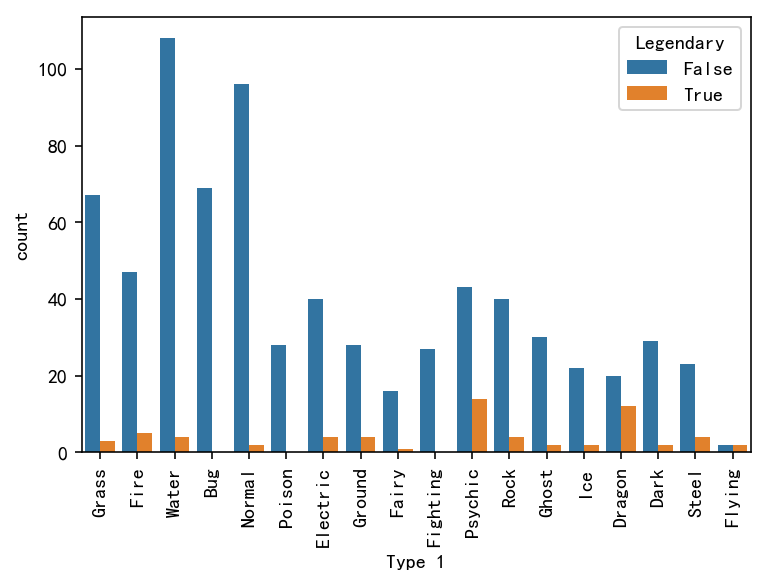

In [136]:
ax = sns.countplot(x="Type 1", hue="Legendary", data=all_info)
plt.xticks(rotation=90)
plt.show()

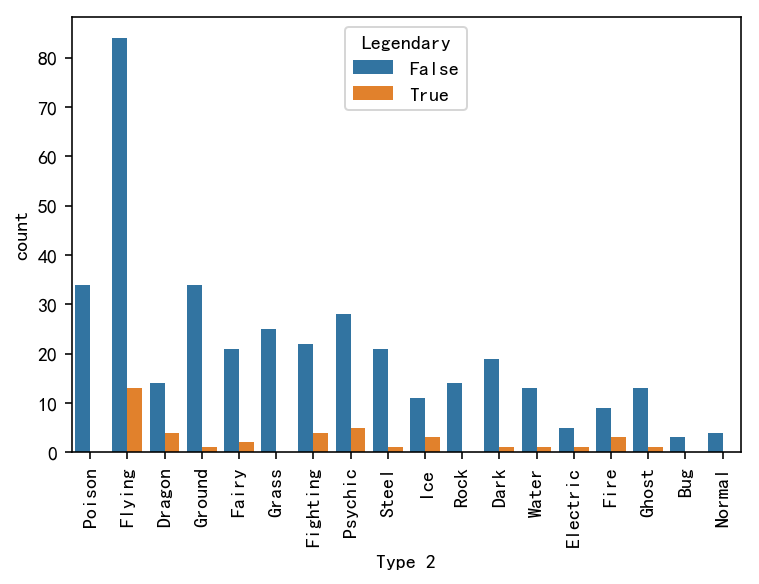

In [137]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=all_info)
plt.xticks(rotation=90)
plt.show()

In [140]:
cols = all_info.columns
cols

Index(['Number', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'First_pokemon', 'Second_pokemon', 'Winner', 'total', 'percent'],
      dtype='object')

In [156]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'percent']

/Users/liwei/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liwei/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


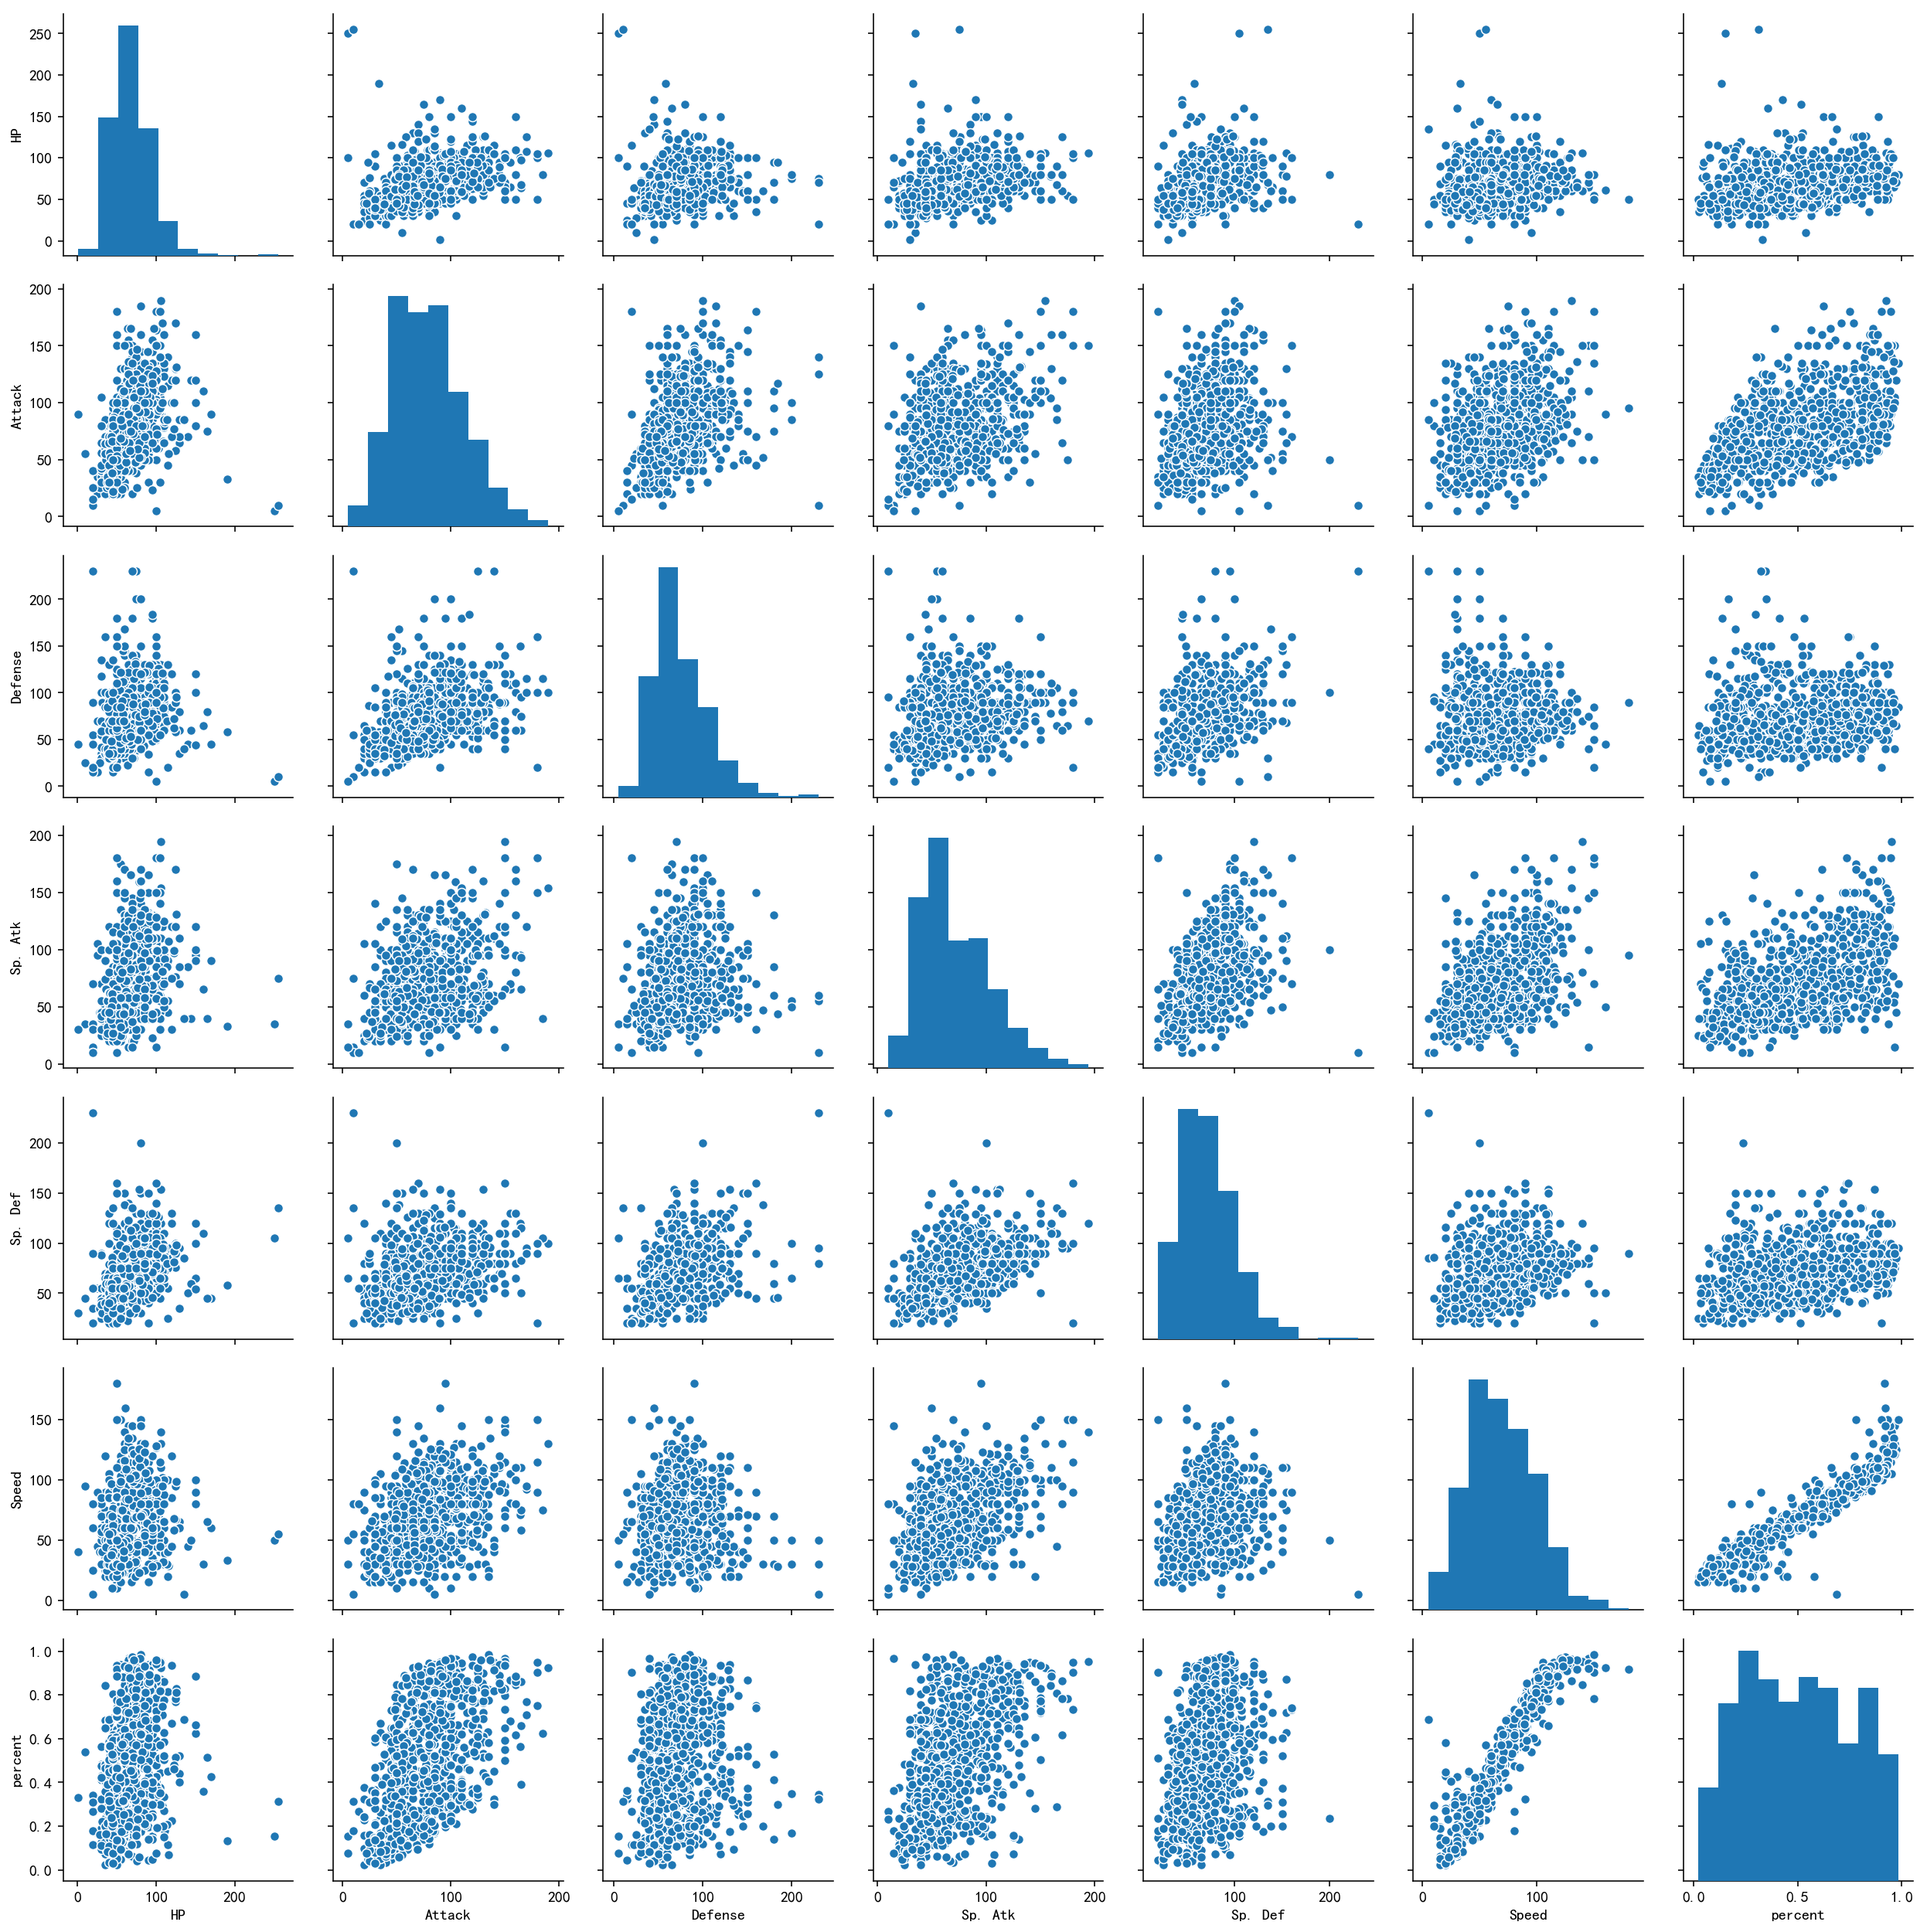

In [157]:
sns.pairplot(all_info[cols])
plt.show()

/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.l

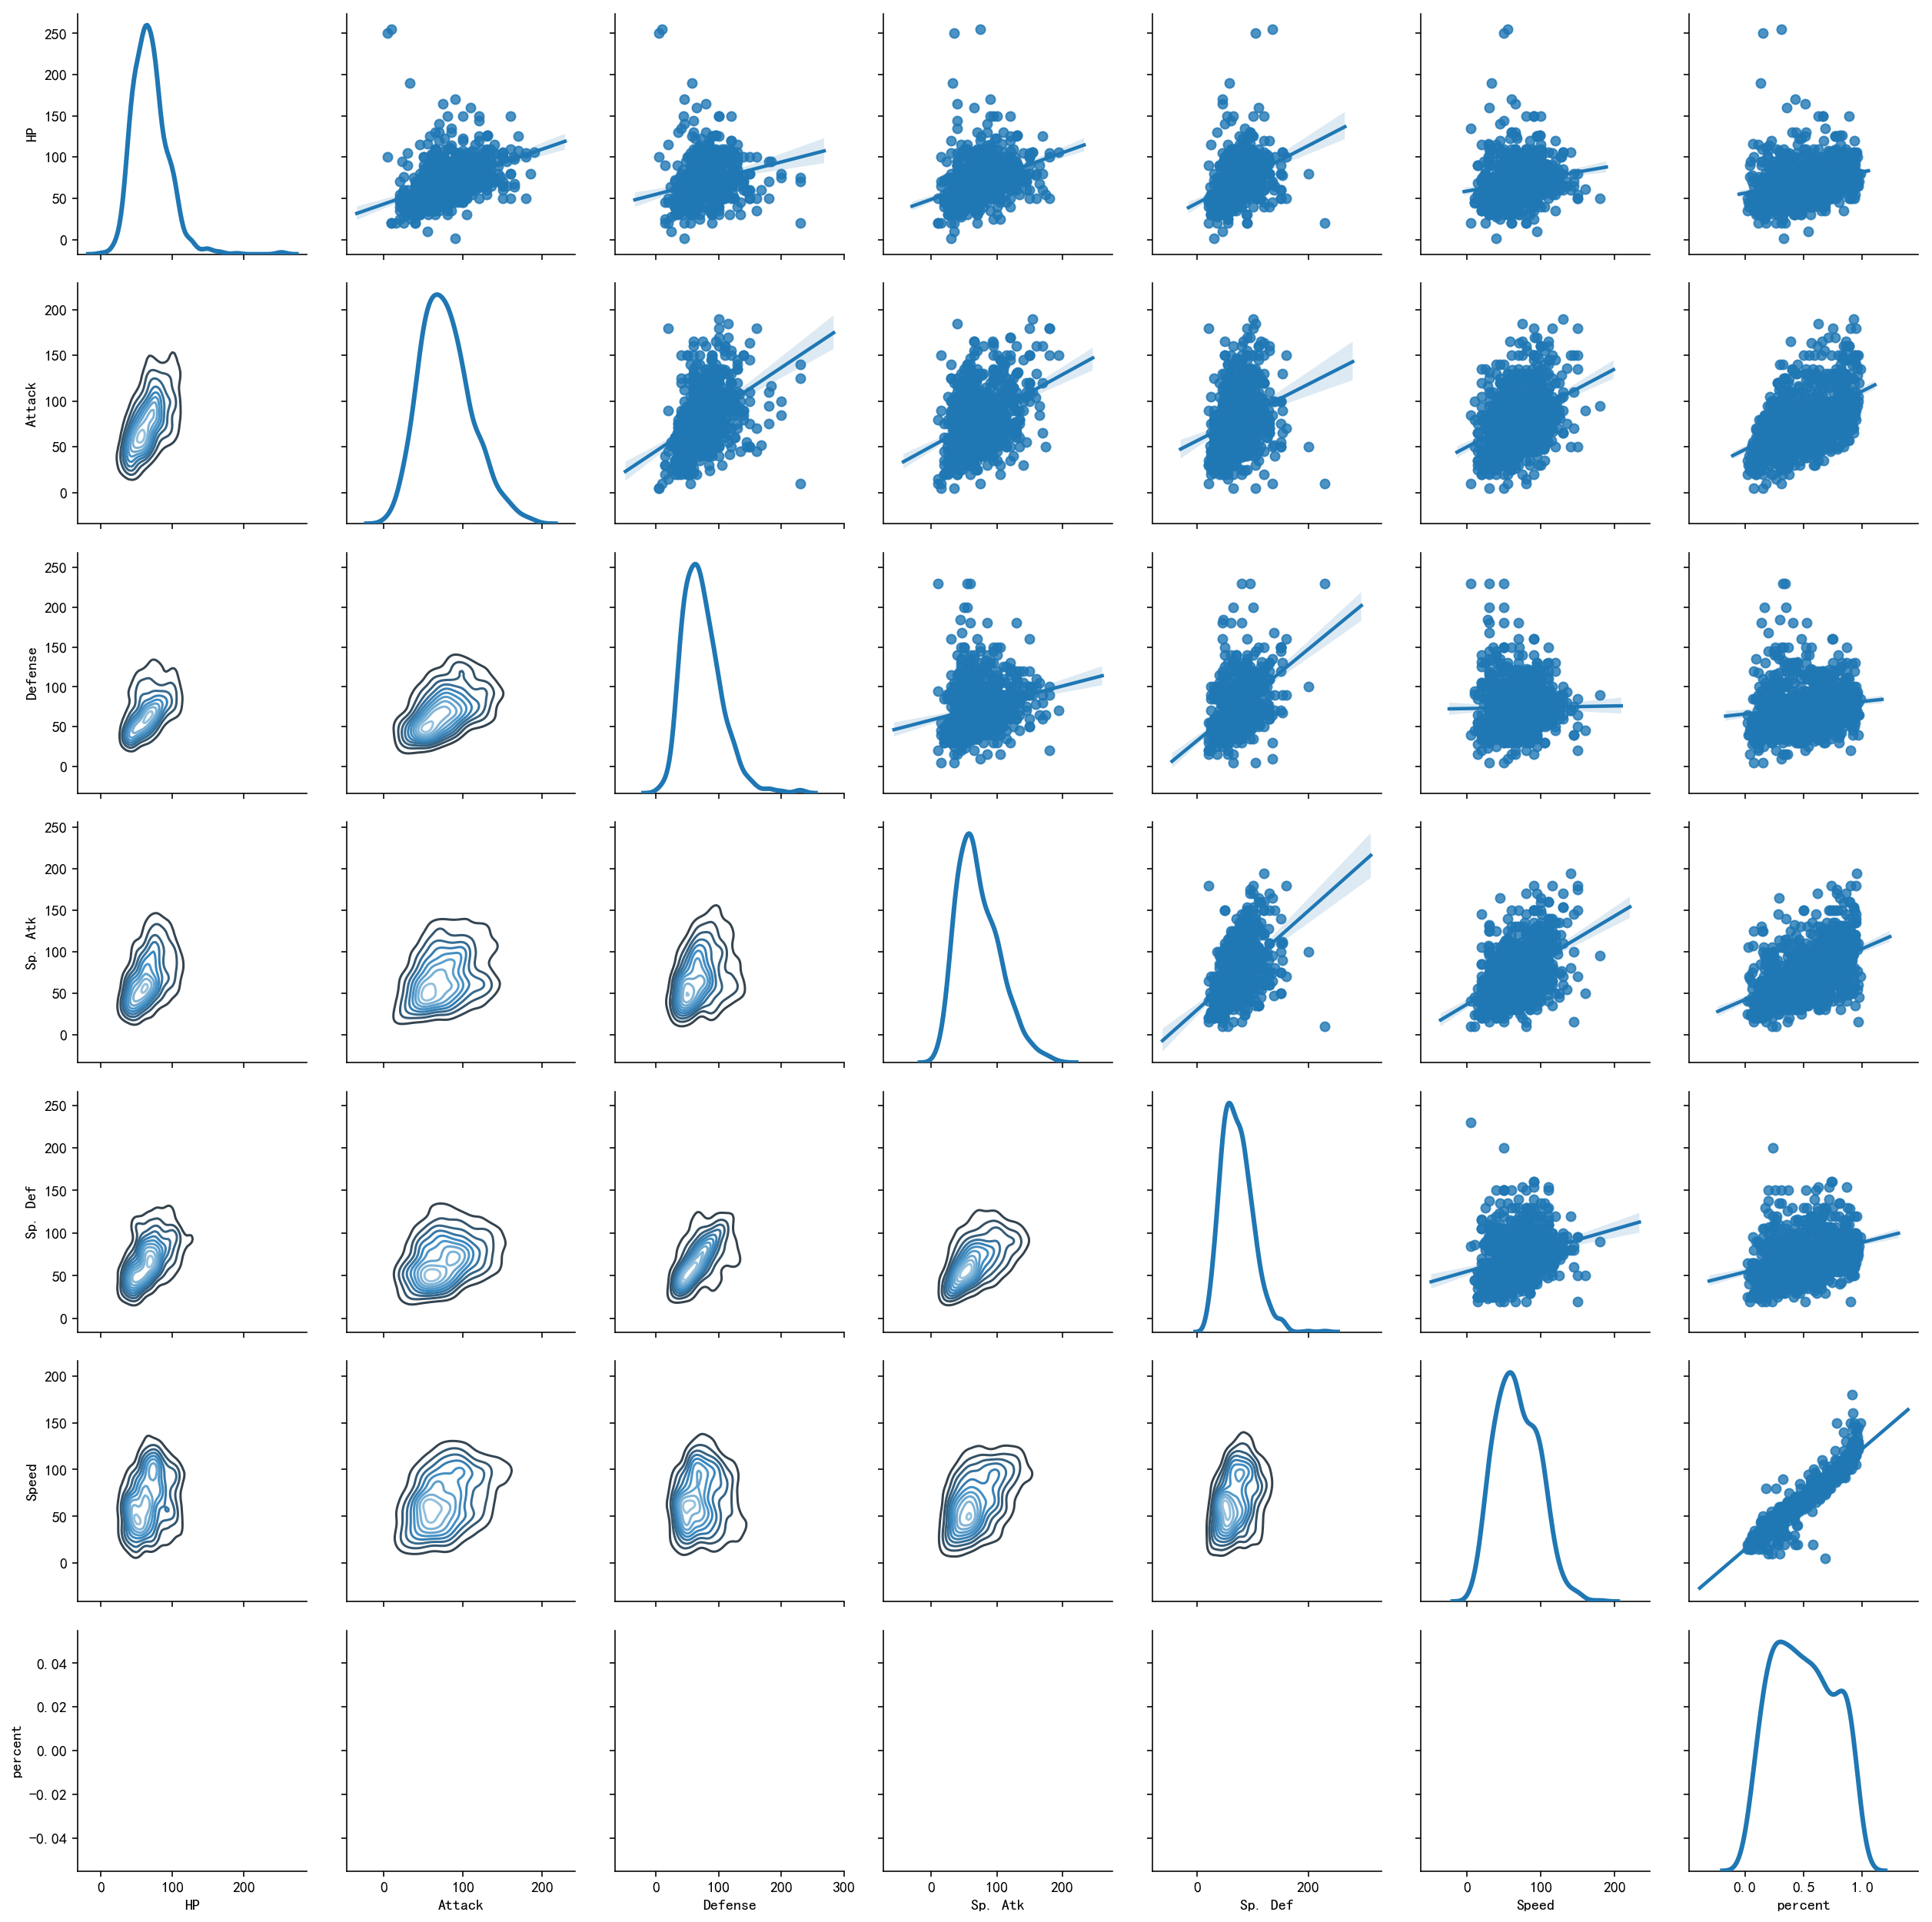

In [158]:
g = sns.PairGrid(all_info[cols], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # 下三角画曲线
g.map_upper(sns.regplot) # 上三角画回归线
g.map_diag(sns.kdeplot, lw=3)
plt.show()

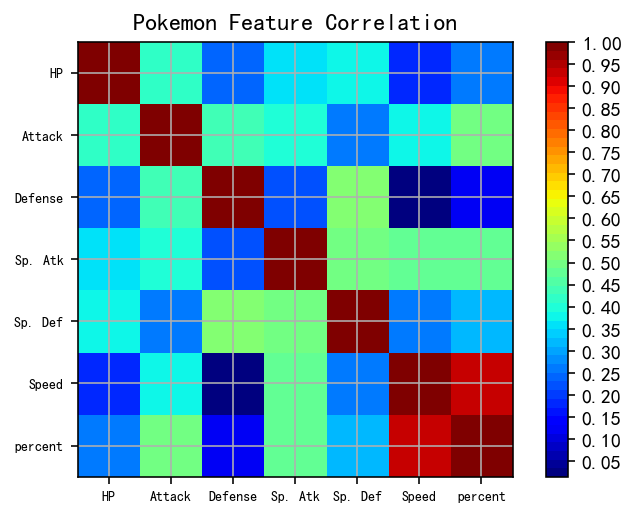

In [164]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels = [
        '', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'percent'
    ]
    ax1.set_xticklabels(labels, fontsize=7)
    ax1.set_yticklabels(labels, fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(
        cax,
        ticks=[
            0.00, .05, .10, .15, .20, .25, .30, .35, .40, .45, .50, .55, .60,
            .65, .70, .75, .8, .85, .90, .95, 1
        ])
    plt.show()


correlation_matrix(all_info[cols])

Looking at the features with the highest correlation to winning which are speed and atatck.

In [159]:
all_info[cols].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,percent
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
percent,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


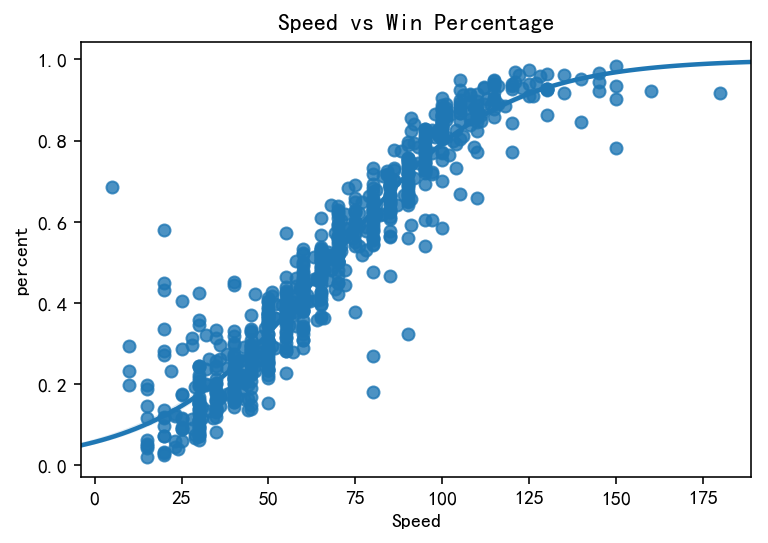

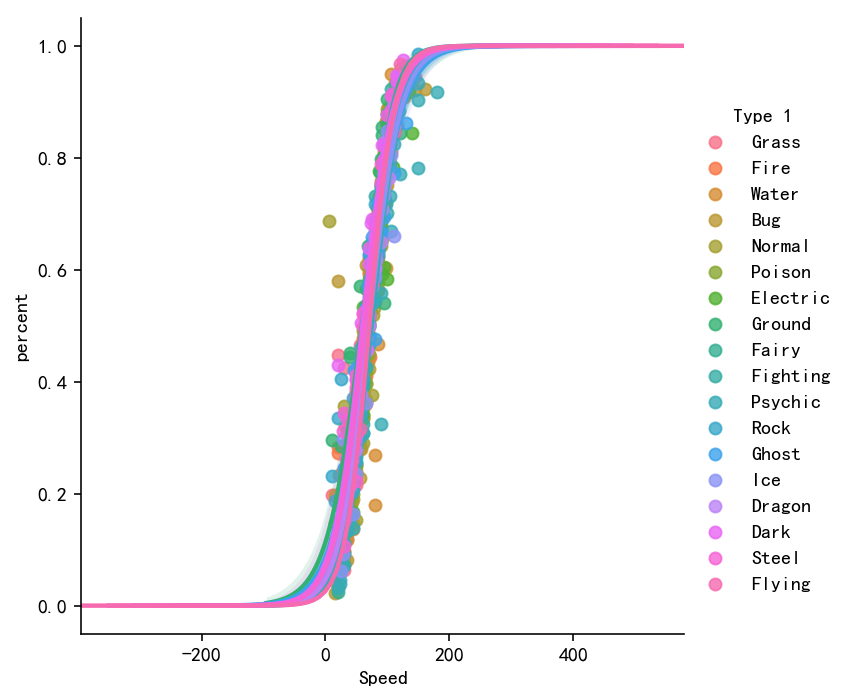

In [168]:
# lmplot 画回归图
# https://zhuanlan.zhihu.com/p/25909753

import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="percent", data=all_info, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="percent", data=all_info, hue='Type 1', logistic=True)  #.set_title("Speed vs Win Percentage")
plt.show()

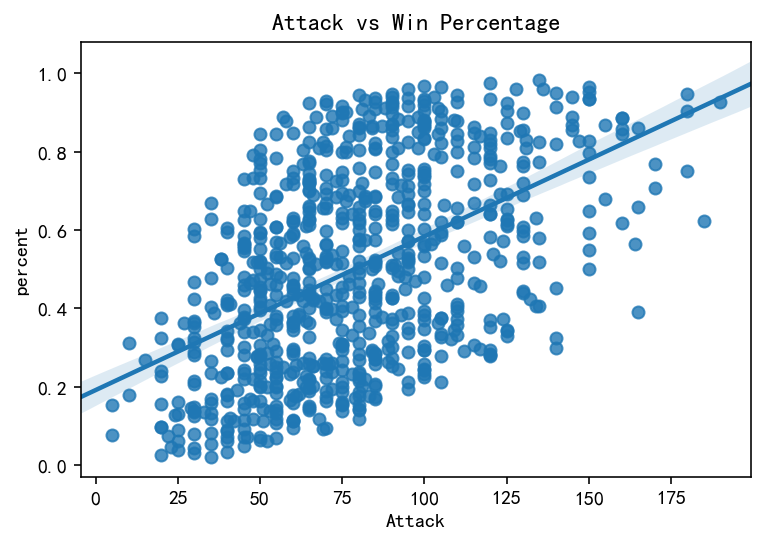

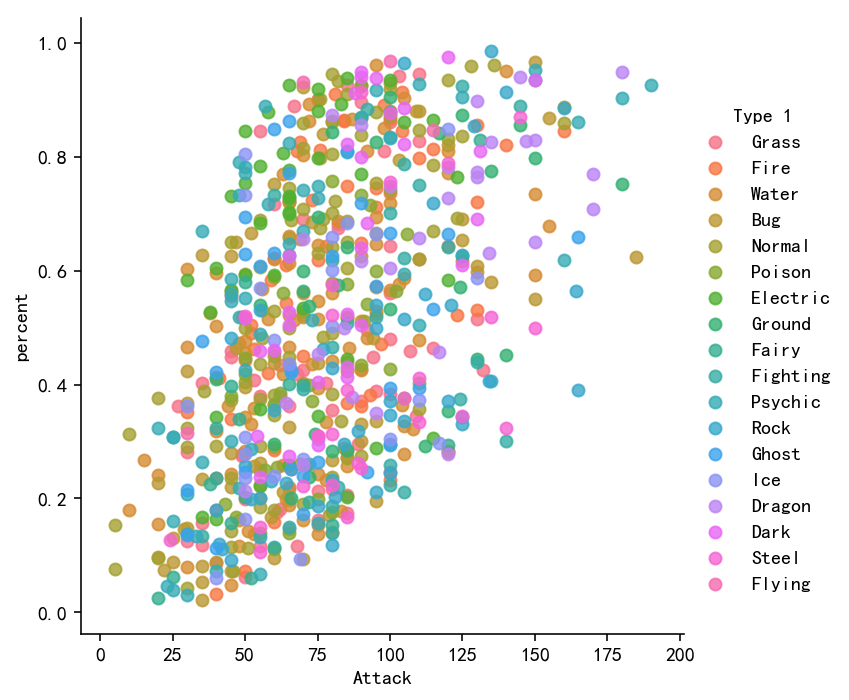

In [167]:
ax = sns.regplot(
    x="Attack", y="percent",
    data=all_info).set_title("Attack vs Win Percentage")
sns.lmplot(
    x="Attack", y="percent", data=all_info, hue='Type 1', fit_reg=False)

plt.show()